### Driver data clustering
1) Read the dataset<br>
2) Remove handle null values if any<br>
3) Depict 'Distance_Feature' and 'Speeding_Feature' on a scatter chart.<br> 
4) Based on 'Distance_Feature' and 'Speeding_Feature' cluster the dataset using KMeans<br>
5) Apply K_Means separately with 2,3,4 and 5 clusters. Depict different clusters on a scatter chart with their respective cluster centriods marked.<br>
6) Scale the data using Standard Scaler<br>
7) Determine appropriate number of cluster using Elbow method after data has been scaled<br>
8) Repeat Q5 with appropriate number of cluster obtained from Elbow method after scaling<br>


In [185]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [186]:
df=pd.read_csv('D:\PYTHON ALL/driverdata.csv')

In [187]:
df.head(10)

,Driver_ID,Distance_Feature,Speeding_Feature
0,3423311935,71.24,28
1,3423313212,52.53,25
2,3423313724,64.54,27
3,3423311373,55.69,22
4,3423310999,54.58,25
5,3423313857,41.91,10
6,3423312432,58.64,20
7,3423311434,52.02,8
8,3423311328,31.25,34
9,3423312488,44.31,19


In [188]:
df.isnull().sum()

Driver_ID           0
Distance_Feature    0
Speeding_Feature    0
dtype: int64

In [189]:
df.shape

(4000, 3)

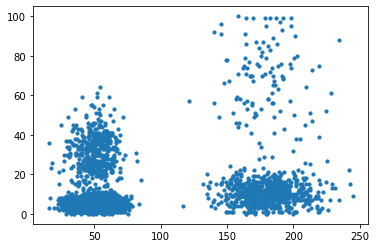

In [190]:
plt.scatter(df['Distance_Feature'],df['Speeding_Feature'],marker='o',s=10)
plt.show()

In [191]:
x=df.iloc[:,1:]

In [192]:
from sklearn.cluster import KMeans

[12184626.129627967, 1316420.850947721, 992634.06067025, 719601.5383469046, 534638.1242580629, 372837.10752638354, 319730.6886818542, 277012.4772417958, 252619.54212000046, 229998.03827517034, 209610.87545208907, 189528.49352554133, 173685.92419856184, 159396.9785437176, 148341.77276150222, 139907.51247036032]


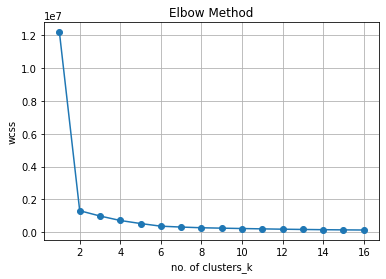

In [193]:
wcss=[]
for i in range(1,17):
    clus=KMeans(n_clusters=i)
    clus.fit(x)
    wcss.append(clus.inertia_)
print(wcss)
plt.plot(range(1,17),wcss,marker='o')
plt.title("Elbow Method")
plt.xlabel('no. of clusters_k')
plt.ylabel('wcss')
plt.grid()
plt.show()

In [247]:
clus2=KMeans(n_clusters=2)
clus2.fit(x)

KMeans(n_clusters=2)

In [248]:
y_pred2=clus2.predict(x)
len(y_pred2)

4000

In [249]:
y_pred2

array([0, 0, 0, ..., 1, 1, 1])

In [250]:
cent2=clus2.cluster_centers_
print(cent2)

[[ 50.04763438   8.82875   ]
 [180.017075    18.29      ]]


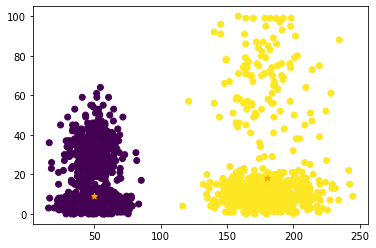

In [251]:
plt.scatter(df['Distance_Feature'],df['Speeding_Feature'],c=y_pred1)
plt.scatter(cent1[:,0],cent1[:,1],marker='*',color='orange')
plt.show()

In [252]:
clus3=KMeans(n_clusters=3)
clus3.fit(x)

KMeans(n_clusters=3)

In [243]:
y_pred3=clus3.predict(x)
len(y_pred3)

4000

In [244]:
y_pred3[:10]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [245]:
cent3=clus3.cluster_centers_
print(cent3)

[[ 50.04763438   8.82875   ]
 [180.34311782  10.52011494]
 [177.83509615  70.28846154]]


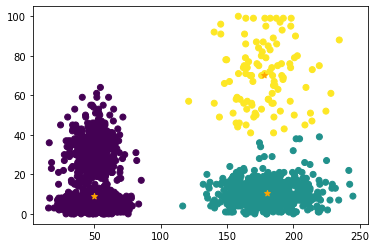

In [246]:
plt.scatter(df['Distance_Feature'],df['Speeding_Feature'],c=y_pred2)
plt.scatter(cent2[:,0],cent2[:,1],marker='*',color='orange')
plt.show()

In [236]:
clus4=KMeans(n_clusters=4)
clus4.fit(x)

KMeans(n_clusters=4)

In [237]:
y_pred4=clus4.predict(x)
len(y_pred4)

4000

In [238]:
y_pred4[:10]

array([0, 0, 0, 0, 0, 3, 0, 3, 0, 0])

In [239]:
cent4=clus4.cluster_centers_
print(cent4)

[[ 50.40482436  32.36533958]
 [180.34311782  10.52011494]
 [177.83509615  70.28846154]
 [ 49.99263253   5.20447169]]


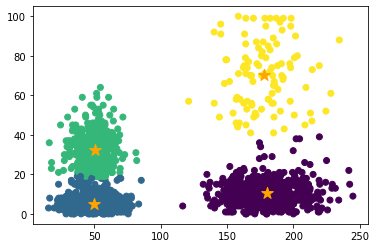

In [240]:
plt.scatter(df['Distance_Feature'],df['Speeding_Feature'],c=y_pred3)
plt.scatter(cent3[:,0],cent3[:,1],marker='*',s=150,color='orange')
plt.show()

In [241]:
clus5=KMeans(n_clusters=5)
clus5.fit(x)

KMeans(n_clusters=5)

In [232]:
y_pred5=clus5.predict(x)
len(y_pred5)

4000

In [233]:
y_pred5[:10]

array([2, 2, 2, 2, 2, 4, 0, 0, 2, 4])

In [234]:
cent5=clus5.cluster_centers_
print(cent5)

[[ 57.4535958    5.28149606]
 [180.43486331  10.5294964 ]
 [ 50.6610396   33.03712871]
 [177.83509615  70.28846154]
 [ 41.03901807   5.38884525]]


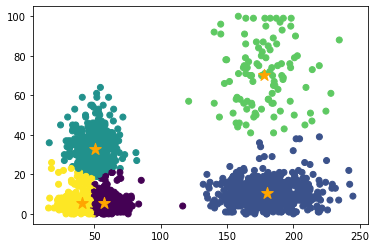

In [235]:
plt.scatter(df['Distance_Feature'],df['Speeding_Feature'],c=y_pred5)
plt.scatter(cent5[:,0],cent5[:,1],marker='*',s=150,color='orange')
plt.show()

### STANDARD SCALING

In [213]:
from sklearn.preprocessing import StandardScaler

In [214]:
x2=df.iloc[:,1:]

In [215]:
x2

,Distance_Feature,Speeding_Feature
0,71.24,28
1,52.53,25
2,64.54,27
3,55.69,22
4,54.58,25
...,...,...
3995,160.04,10
3996,176.17,5
3997,170.91,12
3998,176.14,5


In [216]:
sc=StandardScaler()
x2=sc.fit_transform(x)

In [217]:
x2

array([[-0.0898104 ,  1.26061251],
       [-0.43977285,  1.04174351],
       [-0.215131  ,  1.18765617],
       ...,
       [ 1.77447381,  0.09331115],
       [ 1.87229869, -0.41738319],
       [ 1.72060465, -0.12555785]])

In [218]:
x2=pd.DataFrame(x,columns=['Distance_Feature','Speeding_Feature'])
x2

,Distance_Feature,Speeding_Feature
0,71.24,28
1,52.53,25
2,64.54,27
3,55.69,22
4,54.58,25
...,...,...
3995,160.04,10
3996,176.17,5
3997,170.91,12
3998,176.14,5


In [219]:
sc=[]
for i in range(1,10):
    clus9=KMeans(n_clusters=i)
    clus9.fit(x2)
    print(i ,clus9.inertia_)
    sc.append(clus9.inertia_)
print(sc)    

1 12184626.129627967
2 1316420.850947721
3 992634.06067025
4 719601.0859909927
5 534637.6772506756
6 372842.0289291852
7 319737.71817070094
8 276964.87815935566
9 252875.03185981858
[12184626.129627967, 1316420.850947721, 992634.06067025, 719601.0859909927, 534637.6772506756, 372842.0289291852, 319737.71817070094, 276964.87815935566, 252875.03185981858]


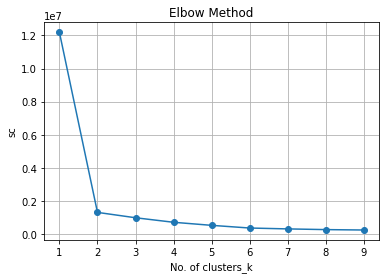

In [220]:
plt.plot(range(1,10),sc,marker='o')
plt.title('Elbow Method')
plt.xlabel('No. of clusters_k')
plt.ylabel('sc')
plt.grid()
plt.show()

In [221]:
clus9=KMeans(n_clusters=4)
clus9.fit(x2)

KMeans(n_clusters=4)

In [222]:
clus9_pred=clus9.predict(x2)

In [223]:
df['Cluster']=clus9_pred

In [224]:
cent5=clus9.cluster_centers_

In [225]:
print(cent5)

[[ 49.99263253   5.20447169]
 [180.34311782  10.52011494]
 [ 50.40482436  32.36533958]
 [177.83509615  70.28846154]]


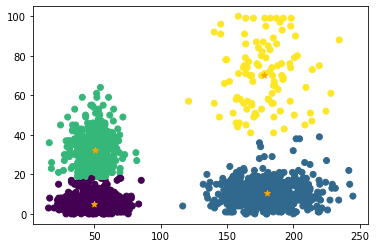

In [226]:
plt.scatter(df['Distance_Feature'],df['Speeding_Feature'],c=clus9_pred)
plt.scatter(cent5[:,0],cent5[:,1],marker='*',color='orange')
plt.show()